# iRL

## Algorihm implementation

In [1]:
from RBF_IRL import *

# GET EXPERT DEMOS FROM PRETRAINED MODEL (PPO 20M)

In [8]:
# if __name__ == '__main__':
#     env = gym.make("Pendulum-v1")
#     model = PPO.load("ppo_pendulum")
#     expert_demos = []
    
#     for _ in range(200):
#         obs, _ = env.reset()
#         trajectory = []
#         done = False
#         while not done:
#             action, _ = model.predict(obs, deterministic=True)
#             next_obs, reward, terminated, truncated, _ = env.step(action)
#             done = terminated or truncated
#             trajectory.append(obs.flatten())
#             obs = next_obs
#         expert_demos.append(np.array(trajectory))

#     with open("pendulum_trajectories.pkl", "wb") as f:
#         pickle.dump(expert_demos, f)

    

In [2]:
import pickle
with open("pendulum_trajectories.pkl", "rb") as f:
    expert_demos = pickle.load(f)
print(len(expert_demos))


200


# MULTI

# Multi Arm Bandit with Gaussian Width learning

In [3]:
# Example 1: Using improved adaptive kernel widths
irl_adaptive = RBF_IRL(
    expert_demos=expert_demos,
    state_space_dim=3,
    n_rbf_centers=None,
    kernel_width_method="adaptive",  # Uses the enhanced adaptive method
    width_scale_factor=0.75,  # Adjust this to control overall width
    learning_rate=0.01,
    epochs=15,
    k_candidates=[2, 3, 4, 5],  # Candidate K values to try
    k_selection_trials = 20  # Number of bandit trials
)

# Example 2: Using the new multivariate-aware method (best for high-dim states)
irl_multivariate = RBF_IRL(
    expert_demos=expert_demos,
    state_space_dim=3,
    n_rbf_centers=None,
    kernel_width_method="adaptive_improved",  # Uses the multivariate-aware method
    width_scale_factor=0.5,
    learning_rate=0.01,
    epochs=15,
    k_candidates=[2, 3, 4, 15, 25],  # Candidate K values to try
    k_selection_trials = 20  # Number of bandit trials
)

# Example 3: Using per-cluster density-based widths
irl_per_cluster = RBF_IRL(
    expert_demos=expert_demos,
    state_space_dim=3,
    n_rbf_centers=None,
    kernel_width_method="per_cluster",  # Each cluster gets width based on its points
    width_scale_factor=1.0,  # Can be higher for this method
    learning_rate=0.01,
    epochs=15,
    k_candidates=[2, 3, 4, 5, 16, 17],  # Candidate K values to try
    k_selection_trials = 20  # Number of bandit trials
)

# Example 4: Using learned widths (adjusted during training)
irl_learned = RBF_IRL(
    expert_demos=expert_demos,
    state_space_dim=3,
    n_rbf_centers=None,
    kernel_width_method="learned",  # Widths are learned during training
    width_scale_factor=0.8,  # Initial scaling factor
    learning_rate=0.01,
    epochs=15,  # More epochs to allow width learning,
    k_candidates=[2, 3, 4, 5],  # Candidate K values to try
    k_selection_trials = 20  # Number of bandit trials
)



Training with Adaptive Kernel Widths...
Selecting K using multi-armed bandit and expert data clustering quality...
Trial 1/20 for K=2, Silhouette Score: 0.8058
Trial 2/20 for K=3, Silhouette Score: 0.8414
Trial 3/20 for K=4, Silhouette Score: 0.8220
Trial 4/20 for K=5, Silhouette Score: 0.8146
Trial 5/20 for K=3, Silhouette Score: 0.8488
Trial 6/20 for K=4, Silhouette Score: 0.8162
Trial 7/20 for K=5, Silhouette Score: 0.8215
Trial 8/20 for K=2, Silhouette Score: 0.8165
Trial 9/20 for K=3, Silhouette Score: 0.8505
Trial 10/20 for K=4, Silhouette Score: 0.8206
Trial 11/20 for K=5, Silhouette Score: 0.8189
Trial 12/20 for K=2, Silhouette Score: 0.8240
Trial 13/20 for K=3, Silhouette Score: 0.8416
Trial 14/20 for K=4, Silhouette Score: 0.8178
Trial 15/20 for K=5, Silhouette Score: 0.8149
Trial 16/20 for K=2, Silhouette Score: 0.8159
Trial 17/20 for K=3, Silhouette Score: 0.8484
Trial 18/20 for K=4, Silhouette Score: 0.8196
Trial 19/20 for K=5, Silhouette Score: 0.8164
Trial 20/20 for K=2

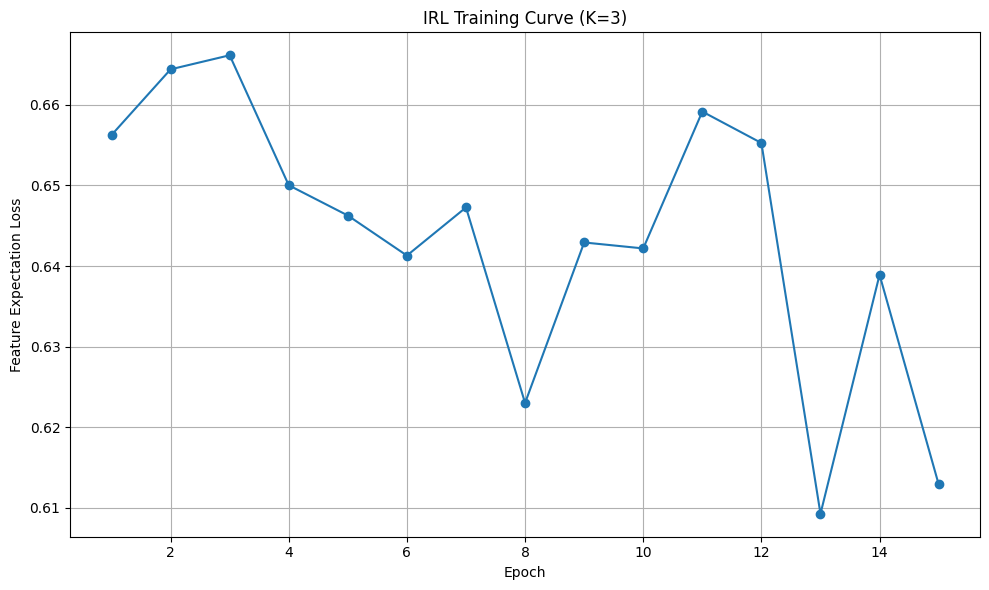

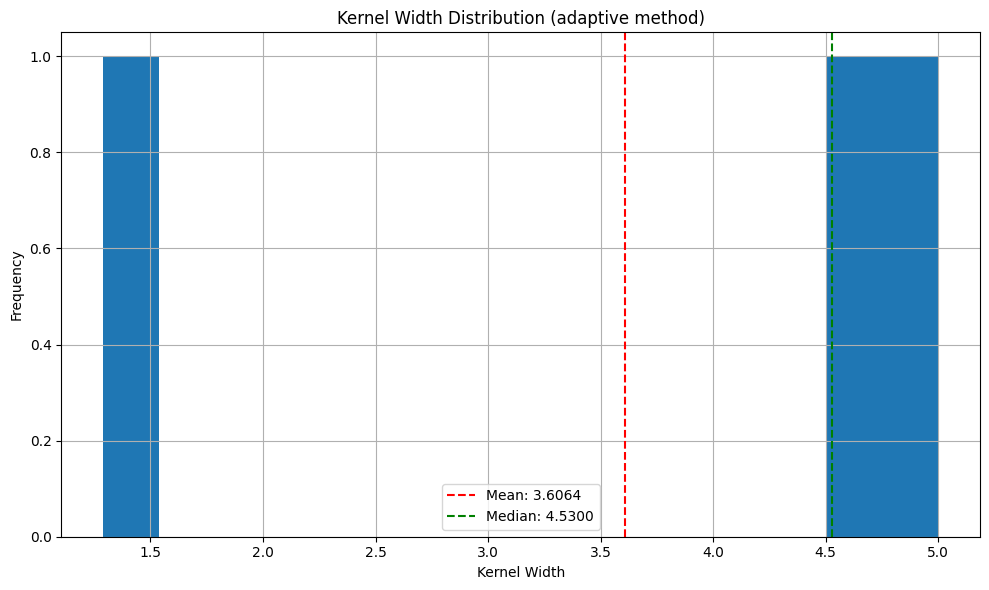

In [4]:
print("\nTraining with Adaptive Kernel Widths...")
losses_adaptive = irl_adaptive.train()
irl_adaptive.plot_training_curve(losses_adaptive)
irl_adaptive.visualize_kernel_widths()

if irl_adaptive.state_space_dim == 2:
    irl_adaptive.visualize_reward(grid_resolution=30)




Training with Multivariate-Aware Kernel Widths...
Selecting K using multi-armed bandit and expert data clustering quality...
Trial 1/20 for K=2, Silhouette Score: 0.8162
Trial 2/20 for K=3, Silhouette Score: 0.8472
Trial 3/20 for K=4, Silhouette Score: 0.8220
Trial 4/20 for K=15, Silhouette Score: 0.8009
Trial 5/20 for K=25, Silhouette Score: 0.7787
Trial 6/20 for K=3, Silhouette Score: 0.8465
Trial 7/20 for K=4, Silhouette Score: 0.8144
Trial 8/20 for K=2, Silhouette Score: 0.8045
Trial 9/20 for K=15, Silhouette Score: 0.8263
Trial 10/20 for K=25, Silhouette Score: 0.7865
Trial 11/20 for K=3, Silhouette Score: 0.8495
Trial 12/20 for K=4, Silhouette Score: 0.8138
Trial 13/20 for K=15, Silhouette Score: 0.8156
Trial 14/20 for K=2, Silhouette Score: 0.8104
Trial 15/20 for K=25, Silhouette Score: 0.7976
Trial 16/20 for K=3, Silhouette Score: 0.8488
Trial 17/20 for K=4, Silhouette Score: 0.8226
Trial 18/20 for K=15, Silhouette Score: 0.8116
Trial 19/20 for K=2, Silhouette Score: 0.8155
Tr

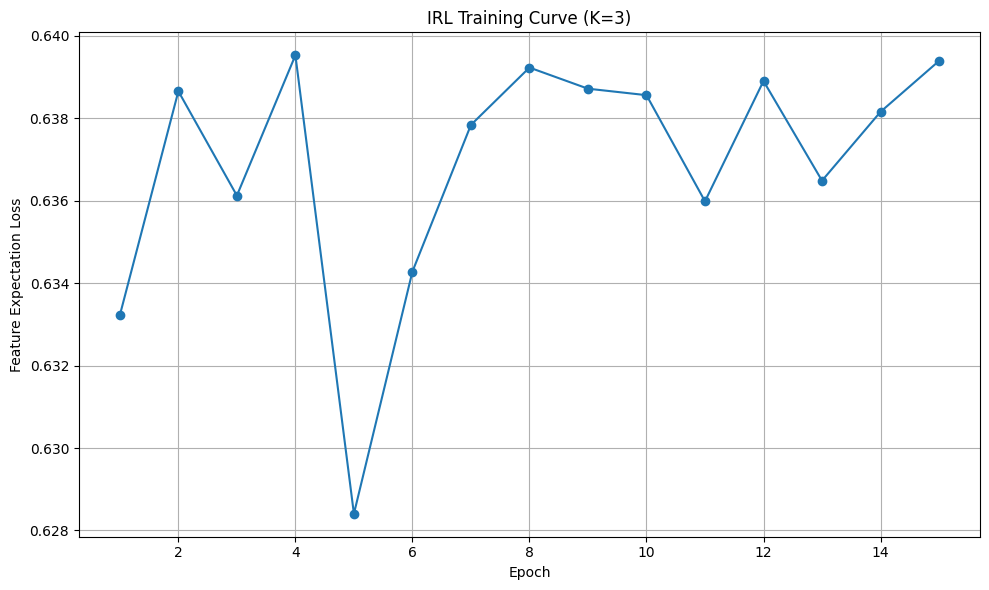

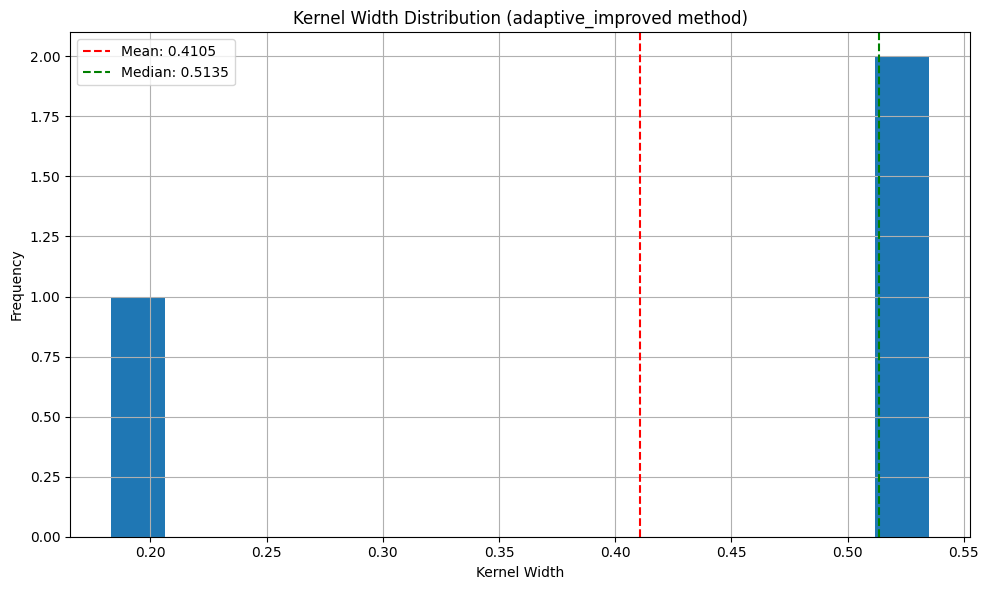

In [5]:

print("\nTraining with Multivariate-Aware Kernel Widths...")
losses_multivariate = irl_multivariate.train()
irl_multivariate.plot_training_curve(losses_multivariate)
irl_multivariate.visualize_kernel_widths()

if irl_multivariate.state_space_dim == 2:
    irl_multivariate.visualize_reward(grid_resolution=30)



Training with Per-Cluster Kernel Widths...
Selecting K using multi-armed bandit and expert data clustering quality...
Trial 1/20 for K=2, Silhouette Score: 0.8201
Trial 2/20 for K=3, Silhouette Score: 0.8409
Trial 3/20 for K=4, Silhouette Score: 0.8157
Trial 4/20 for K=5, Silhouette Score: 0.8204
Trial 5/20 for K=16, Silhouette Score: 0.8118
Trial 6/20 for K=17, Silhouette Score: 0.8068
Trial 7/20 for K=3, Silhouette Score: 0.8481
Trial 8/20 for K=5, Silhouette Score: 0.8241
Trial 9/20 for K=2, Silhouette Score: 0.8143
Trial 10/20 for K=4, Silhouette Score: 0.8202
Trial 11/20 for K=16, Silhouette Score: 0.8047
Trial 12/20 for K=17, Silhouette Score: 0.7940
Trial 13/20 for K=3, Silhouette Score: 0.8483
Trial 14/20 for K=5, Silhouette Score: 0.8208
Trial 15/20 for K=4, Silhouette Score: 0.8230
Trial 16/20 for K=2, Silhouette Score: 0.8112
Trial 17/20 for K=16, Silhouette Score: 0.8046
Trial 18/20 for K=17, Silhouette Score: 0.8027
Trial 19/20 for K=3, Silhouette Score: 0.8429
Trial 20/2

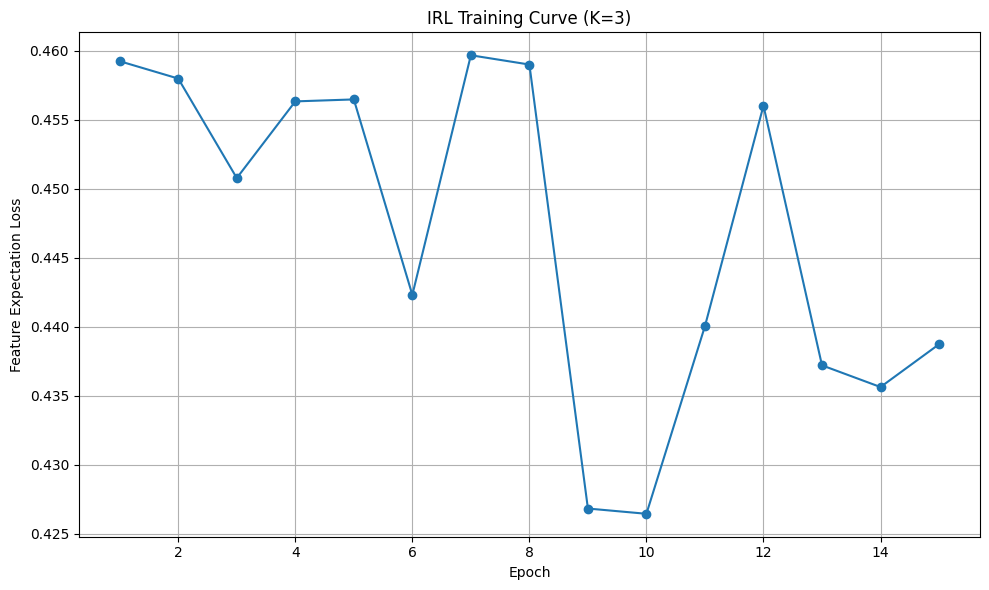

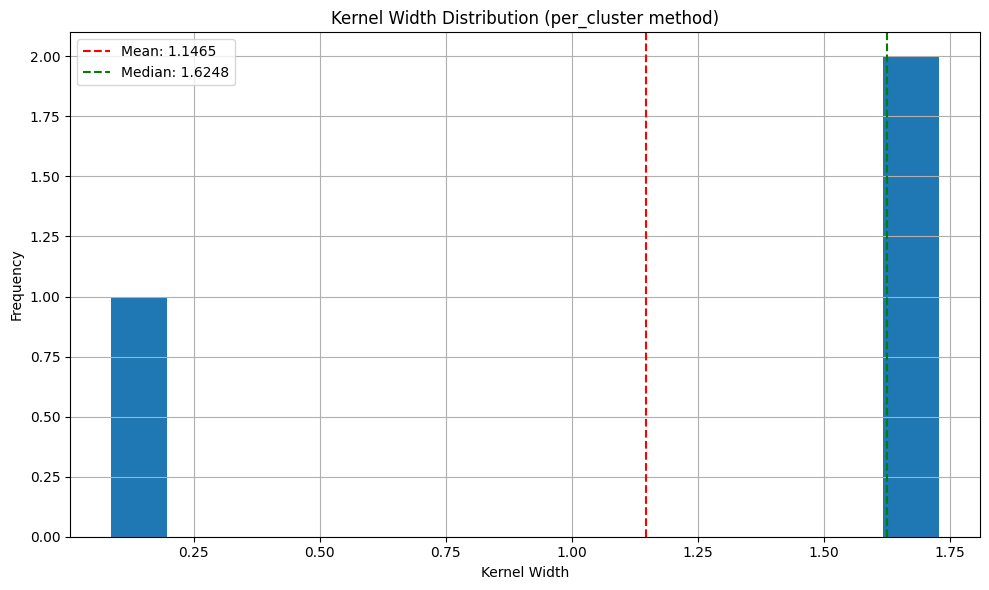

In [6]:

print("\nTraining with Per-Cluster Kernel Widths...")
losses_per_cluster = irl_per_cluster.train()
irl_per_cluster.plot_training_curve(losses_per_cluster)
irl_per_cluster.visualize_kernel_widths()

if irl_per_cluster.state_space_dim == 2:
    irl_per_cluster.visualize_reward(grid_resolution=30)



Training with Learned Kernel Widths...
Selecting K using multi-armed bandit and expert data clustering quality...
Trial 1/20 for K=2, Silhouette Score: 0.8129
Trial 2/20 for K=3, Silhouette Score: 0.8367
Trial 3/20 for K=4, Silhouette Score: 0.8185
Trial 4/20 for K=5, Silhouette Score: 0.8259
Trial 5/20 for K=3, Silhouette Score: 0.8430
Trial 6/20 for K=5, Silhouette Score: 0.8234
Trial 7/20 for K=4, Silhouette Score: 0.8199
Trial 8/20 for K=2, Silhouette Score: 0.8118
Trial 9/20 for K=3, Silhouette Score: 0.8444
Trial 10/20 for K=5, Silhouette Score: 0.8129
Trial 11/20 for K=4, Silhouette Score: 0.8201
Trial 12/20 for K=2, Silhouette Score: 0.8074
Trial 13/20 for K=3, Silhouette Score: 0.8478
Trial 14/20 for K=5, Silhouette Score: 0.8252
Trial 15/20 for K=4, Silhouette Score: 0.8223
Trial 16/20 for K=2, Silhouette Score: 0.8095
Trial 17/20 for K=3, Silhouette Score: 0.8518
Trial 18/20 for K=5, Silhouette Score: 0.8278
Trial 19/20 for K=4, Silhouette Score: 0.8215
Trial 20/20 for K=2,

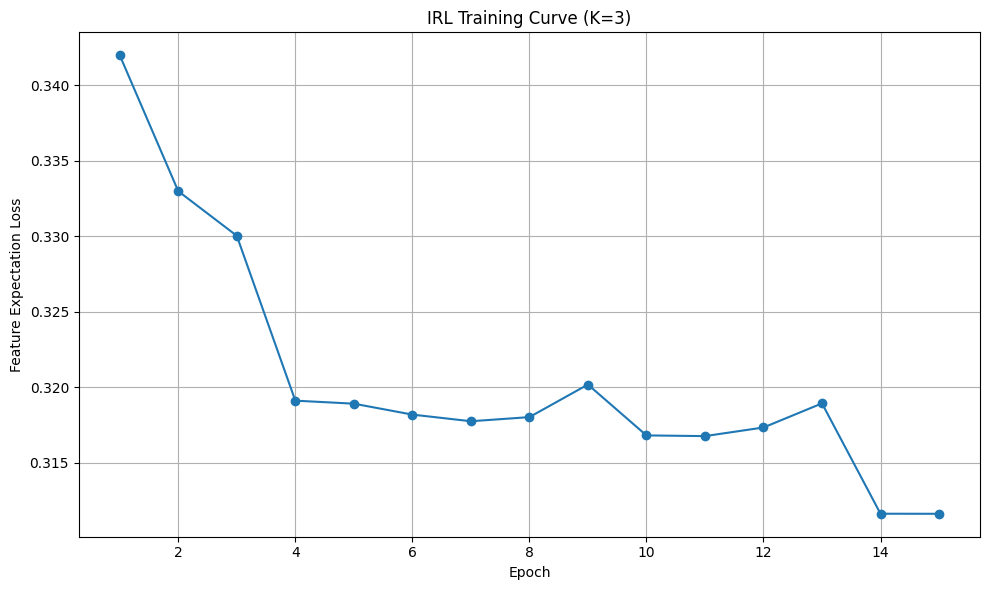

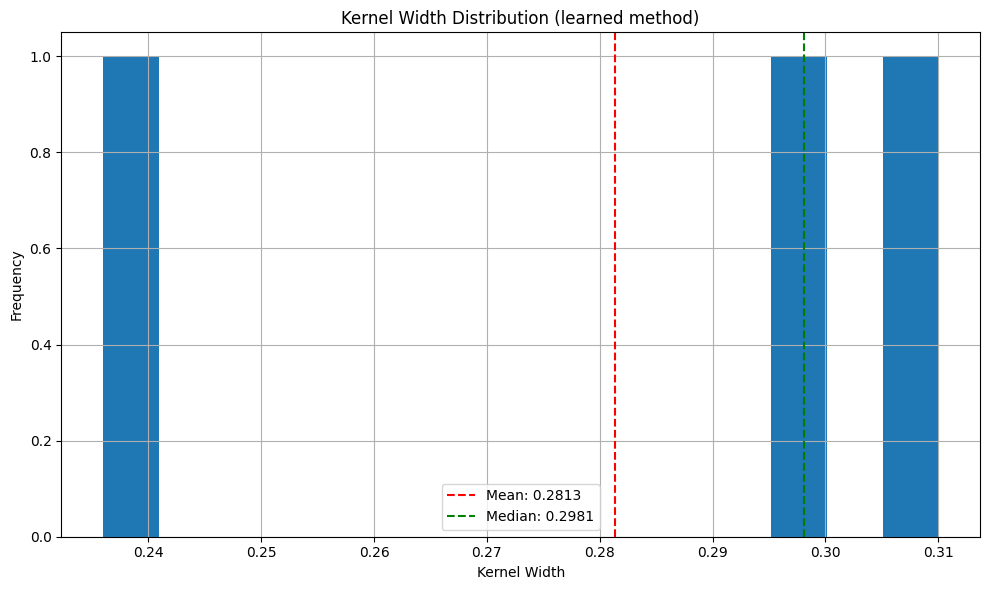

In [7]:

print("\nTraining with Learned Kernel Widths...")
losses_learned = irl_learned.train()
irl_learned.plot_training_curve(losses_learned)
irl_learned.visualize_kernel_widths()

if irl_learned.state_space_dim == 2:
    irl_learned.visualize_reward(grid_resolution=30)


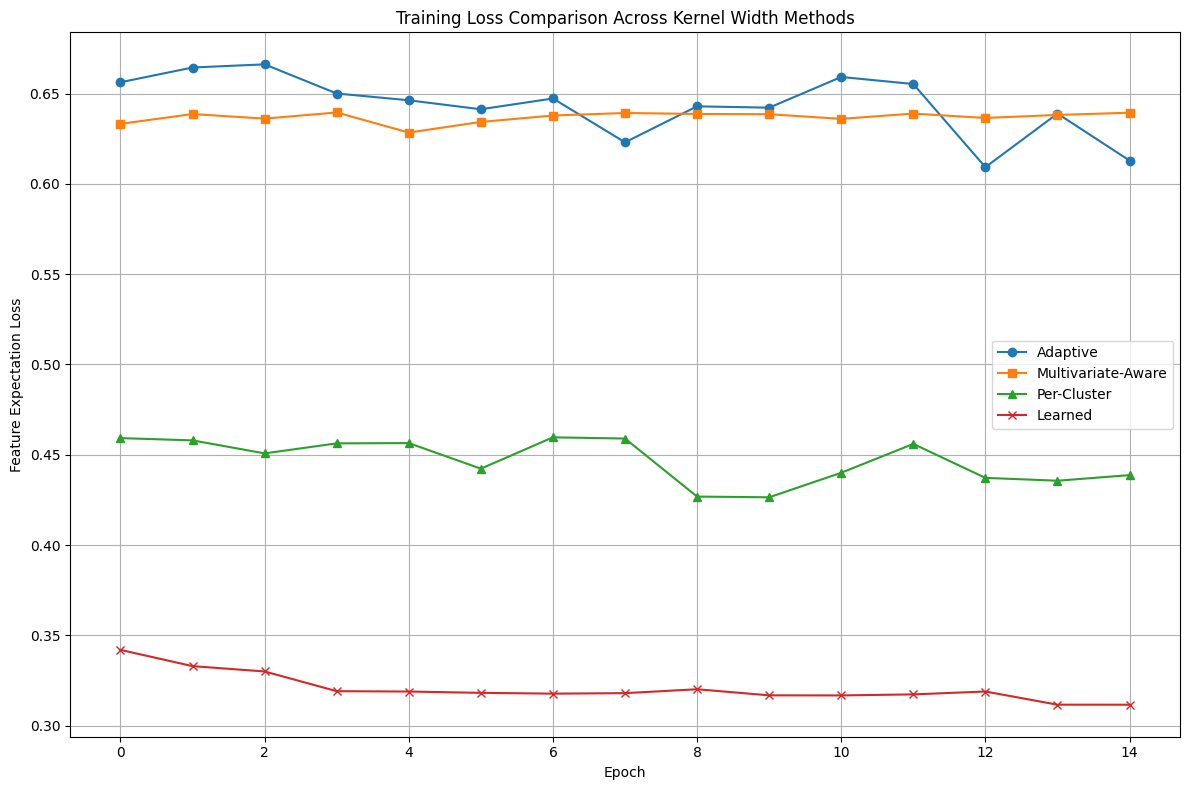

In [8]:

plt.figure(figsize=(12, 8))
plt.plot(losses_adaptive, label="Adaptive", marker='o')
plt.plot(losses_multivariate, label="Multivariate-Aware", marker='s')
plt.plot(losses_per_cluster, label="Per-Cluster", marker='^')
plt.plot(losses_learned, label="Learned", marker='x')
plt.xlabel("Epoch")
plt.ylabel("Feature Expectation Loss")
plt.title("Training Loss Comparison Across Kernel Width Methods")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

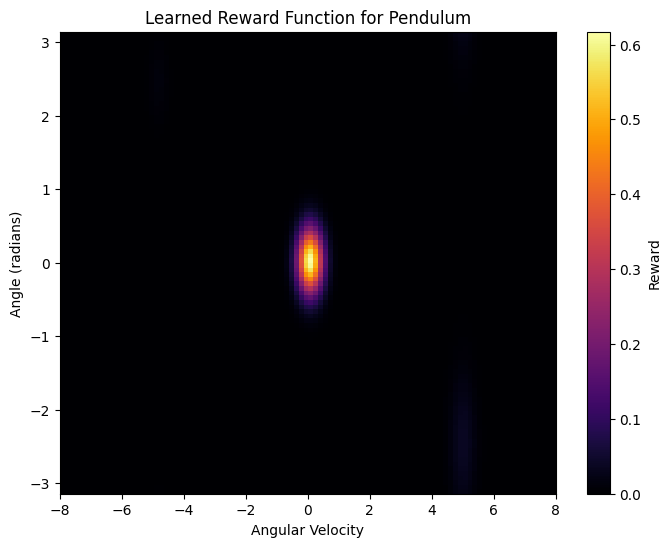

In [9]:

irl_agent = irl_learned

# Visualization of Reward Function
theta_vals = np.linspace(-np.pi, np.pi, 100)
omega_vals = np.linspace(-8, 8, 100)
rewards = np.zeros((100, 100))

for i, theta in enumerate(theta_vals):
    for j, omega in enumerate(omega_vals):
        state = np.array([np.cos(theta), np.sin(theta), omega])
        rewards[i, j] = irl_agent.get_reward(state)

plt.figure(figsize=(8, 6))
plt.imshow(rewards, extent=[-8, 8, -np.pi, np.pi], origin='lower', aspect='auto', cmap='inferno')
plt.colorbar(label='Reward')
plt.xlabel('Angular Velocity')
plt.ylabel('Angle (radians)')
plt.title('Learned Reward Function for Pendulum')
plt.show()

# comparing (by learning policy from learned reward)

In [22]:
import numpy as np
from stable_baselines3 import PPO
import gymnasium as gym

env = gym.make("Pendulum-v1")
original_model = PPO.load("ppo_pendulum")


new_model = PPO("MlpPolicy", env, verbose=1)

# custom rewar
def custom_reward_wrapper(env, irl_agent):
    class CustomRewardEnv(gym.Wrapper):
        def __init__(self, env):
            super().__init__(env)
        def step(self, action):
            next_obs, _, terminated, truncated, info = self.env.step(action)
            reward = irl_agent.get_reward(next_obs)
            return next_obs, reward, terminated, truncated, info
    return CustomRewardEnv(env)

new_env = custom_reward_wrapper(env, irl_learned)
new_model.learn(total_timesteps=1_000_000)




Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 200       |
|    ep_rew_mean     | -1.16e+03 |
| time/              |           |
|    fps             | 1833      |
|    iterations      | 1         |
|    time_elapsed    | 1         |
|    total_timesteps | 2048      |
----------------------------------
---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 200       |
|    ep_rew_mean          | -1.31e+03 |
| time/                   |           |
|    fps                  | 1247      |
|    iterations           | 2         |
|    time_elapsed         | 3         |
|    total_timesteps      | 4096      |
| train/                  |           |
|    approx_kl            | 0.0026621 |
|    clip_fraction        | 0.0115    |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.42   

In [27]:
# evaluate policy based on episodes
def evaluate_policy(model, env, episodes=2000):
    rewards = []
    for _ in range(episodes):
        obs, _ = env.reset()
        total_reward = 0
        done = False
        while not done:
            action, _ = model.predict(obs, deterministic=True)
            obs, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated
            total_reward += reward
        rewards.append(total_reward)
    return np.mean(rewards)

original_score = evaluate_policy(original_model, env)
new_score = evaluate_policy(new_model, env)


print(f"Original PPO policy score: {original_score}")
print(f"New PPO policy (IRL) score: {new_score}")


Original PPO policy score: -191.80589173466987
New PPO policy (IRL) score: -174.42225059970053
